In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import signal
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
import seed_to_harvest as sth

In [6]:

def process_macd(df, yt, flt, start_season, end_season):
    #resetting var
    emg, mat, sen, dor, mask= 0, 0, 0, 0, 0
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame({flt: df})
    emg, mat, sen, dor, _, _, mask = sth.macd_stages(df, yt, flt, start_season, end_season)
    
    if mask == 1:
        return emg,mat,sen,dor
    else:
        return 0,0,0,0
    
crop_id=[ 'Unidentify','Corn','Cotton','Rice','Sorghum','Soybeans','Sunflower','','','','Peanuts','Tobacco','Sweet Corn','Pop or Orn Corn','Mint','','','','','','','Barley','Durum Wheat','Spring Wheat','Winter Wheat','Other Small Grains','Dbl Crop WinWht/Soybeans','Rye','Oats','Millet','Speltz','Canola','Flaxseed','Safflower','Rape Seed','Mustard','Alfalfa','Other Hay/Non Alfalfa','Camelina','Buckwheat','','Sugarbeets','Dry Beans','Potatoes','Other Crops','Sugarcane','Sweet Potatoes','Misc Vegs & Fruits','Watermelons','Onions','Cucumbers','Chick Peas','Lentils','Peas','Tomatoes','Caneberries','Hops','Herbs','Clover/Wildflowers','Sod/Grass Seed','Switchgrass','Fallow/Idle Cropland','Pasture/Grass','Forest','Shrubland','Barren','Cherries','Peaches','Apples','Grapes','Christmas Trees','Other Tree Crops','Citrus','Pecans','Almonds','Walnuts','Pears','','','','Clouds/No Data','Developed','Water','','','','Wetlands','Nonag/Undefined','','','','Aquaculture','','','','','','','','','','','','','','','','','','','Open Water','Perennial Ice/Snow','','','','','','','','','Developed/Open Space','Developed/Low Intensity','Developed/Med Intensity','Developed/High Intensity','','','','','','','Barren','','','','','','','','','','Deciduous Forest','Evergreen Forest','Mixed Forest','','','','','','','','','Shrubland','','','','','','','','','','','','','','','','','','','','','','','','Grassland/Pasture','','','','','','','','','','','','','','Woody Wetlands','','','','','Herbaceous Wetlands','','','','','','','','','Pistachios','Triticale','Carrots','Asparagus','Garlic','Cantaloupes','Prunes','Olives','Oranges','Honeydew Melons','Broccoli','Avocados','Peppers','Pomegranates','Nectarines','Greens','Plums','Strawberries','Squash','Apricots','Vetch','Dbl Crop WinWht/Corn','Dbl Crop Oats/Corn','Lettuce','Dbl Crop Triticale/Corn','Pumpkins','Dbl Crop Lettuce/Durum Wht','Dbl Crop Lettuce/Cantaloupe','Dbl Crop Lettuce/Cotton','Dbl Crop Lettuce/Barley','Dbl Crop Durum Wht/Sorghum','Dbl Crop Barley/Sorghum','Dbl Crop WinWht/Sorghum','Dbl Crop Barley/Corn','Dbl Crop WinWht/Cotton','Dbl Crop Soybeans/Cotton','Dbl Crop Soybeans/Oats','Dbl Crop Corn/Soybeans','Blueberries','Cabbage','Cauliflower','Celery','Radishes','Turnips','Eggplants','Gourds','Cranberries','','','','Dbl Crop Barley/Soybeans']


In [2]:
sid=0
ts=pd.read_hdf(f'sites3/Site{sid:03}_NBARint.h5')
ts=ts.interpolate(method='linear',axis=0)
cdl=pd.read_hdf(f'cdl3/Site{sid:03}_cdl.h5')
season=pd.read_hdf(f'season1/Site{sid:03}_season_day.h5')

yt='2008'
start_season = season.loc[int(yt)][0]
end_season = season.loc[int(yt)][1]
org_ts=ts.loc[yt]['mean']

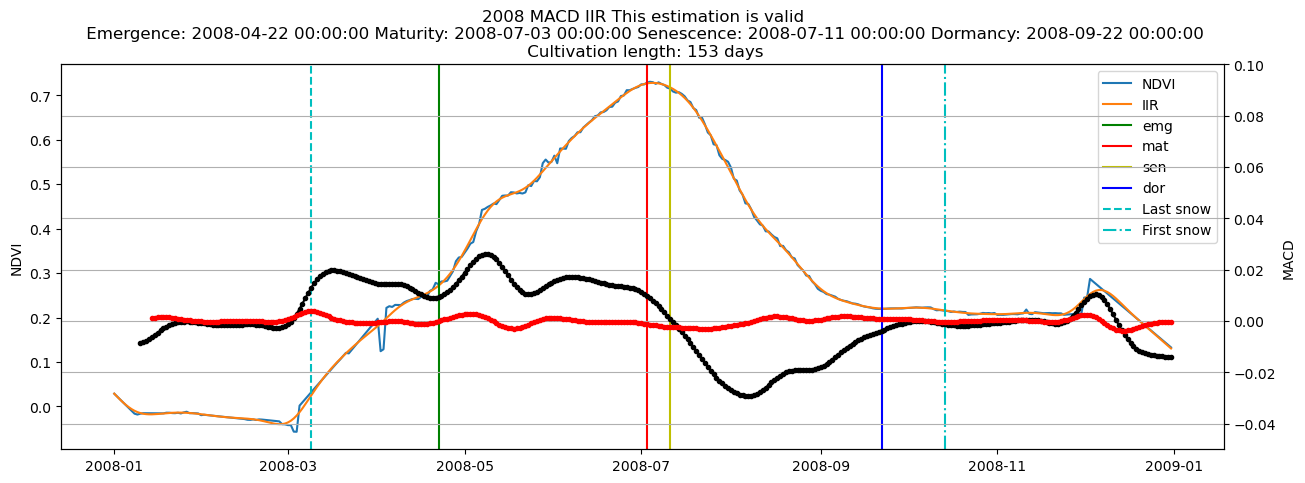

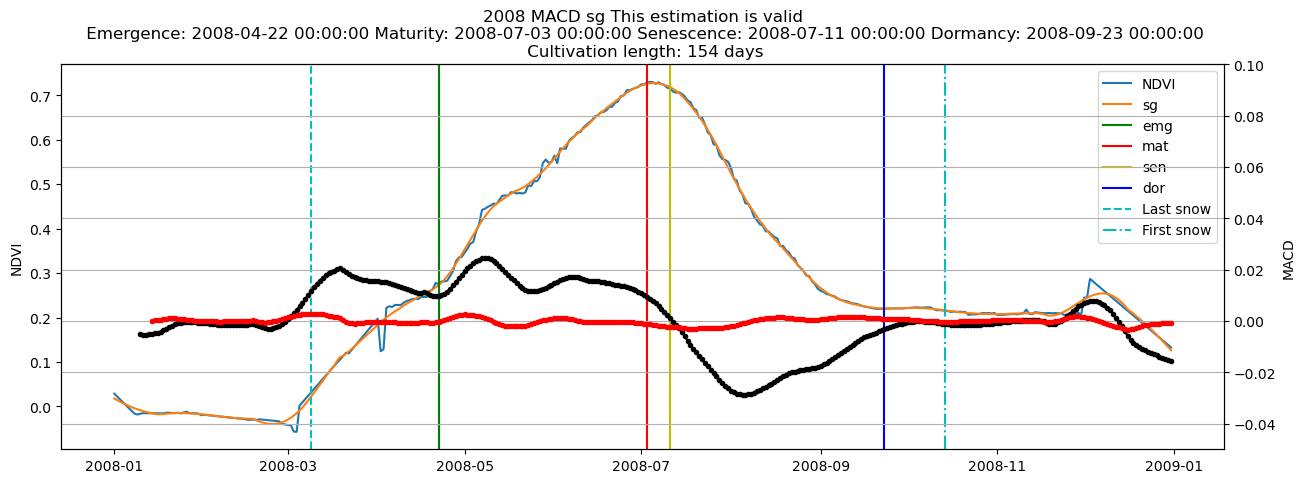

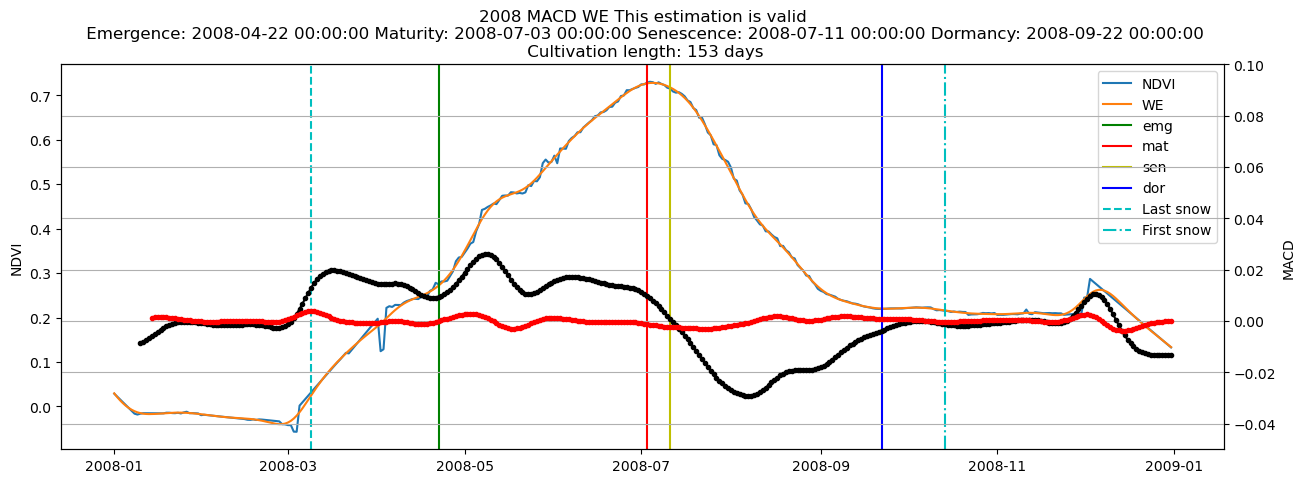

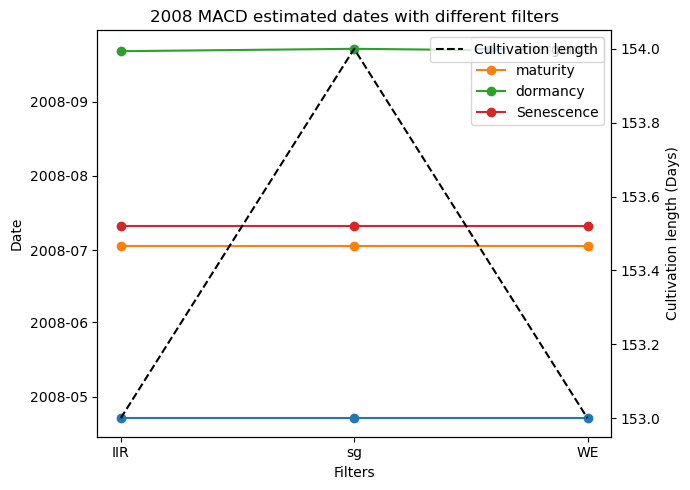

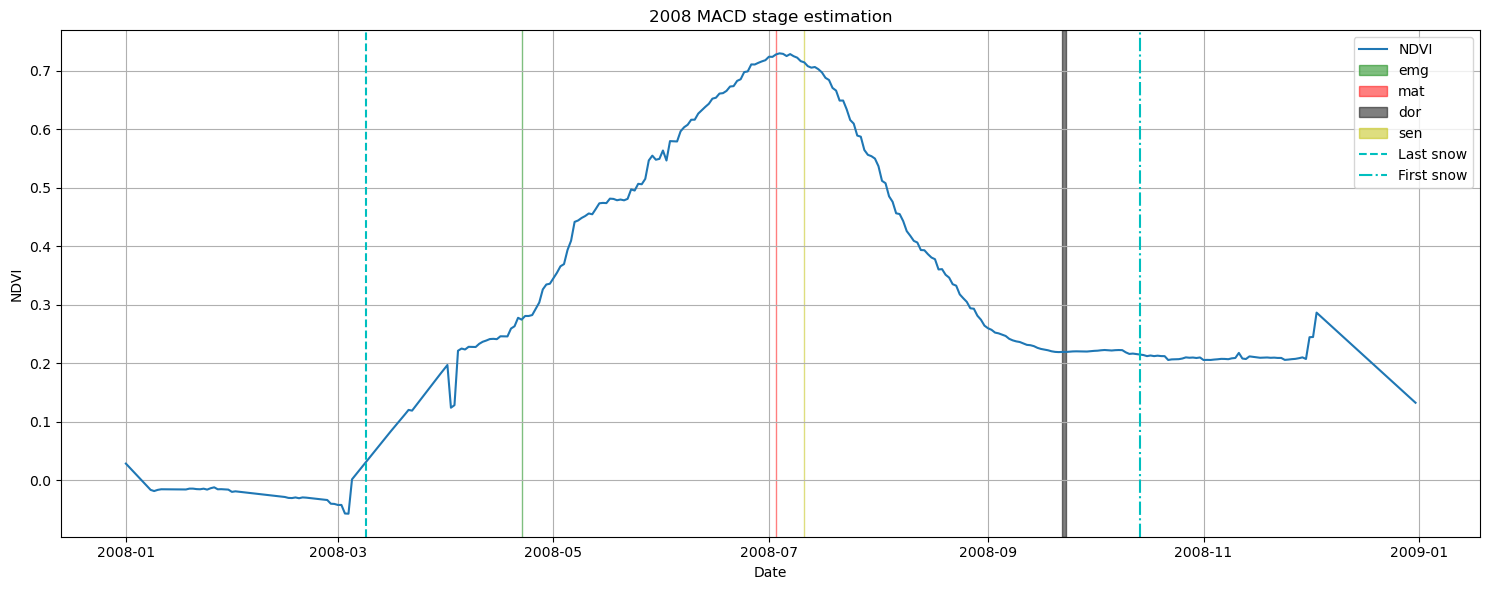

In [3]:
s1dL, s2dL, s4dL, s3dL, fltL, valL = [], [], [], [], [], []


IIR_smoothed = sth.IIRff(org_ts, 3, 0.1)
sg_smoothed = signal.savgol_filter(org_ts, window_length=31, polyorder=2)
we_smoothed = sth.WEfilter(org_ts,3,1000)


sth.plot_macd(IIR_smoothed, yt, 'IIR', org_ts, start_season, end_season,s1dL, s2dL, s4dL, s3dL, fltL, valL)
sth.plot_macd(sg_smoothed, yt, 'sg', org_ts, start_season, end_season,s1dL, s2dL, s4dL, s3dL, fltL, valL)
sth.plot_macd(we_smoothed, yt, 'WE', org_ts, start_season, end_season,s1dL, s2dL, s4dL, s3dL, fltL, valL)

sth.plot_uncertain(org_ts, start_season, end_season, yt,s1dL, s2dL, s4dL, s3dL, fltL)
plt.savefig('result/flt_macd.pdf')

Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order


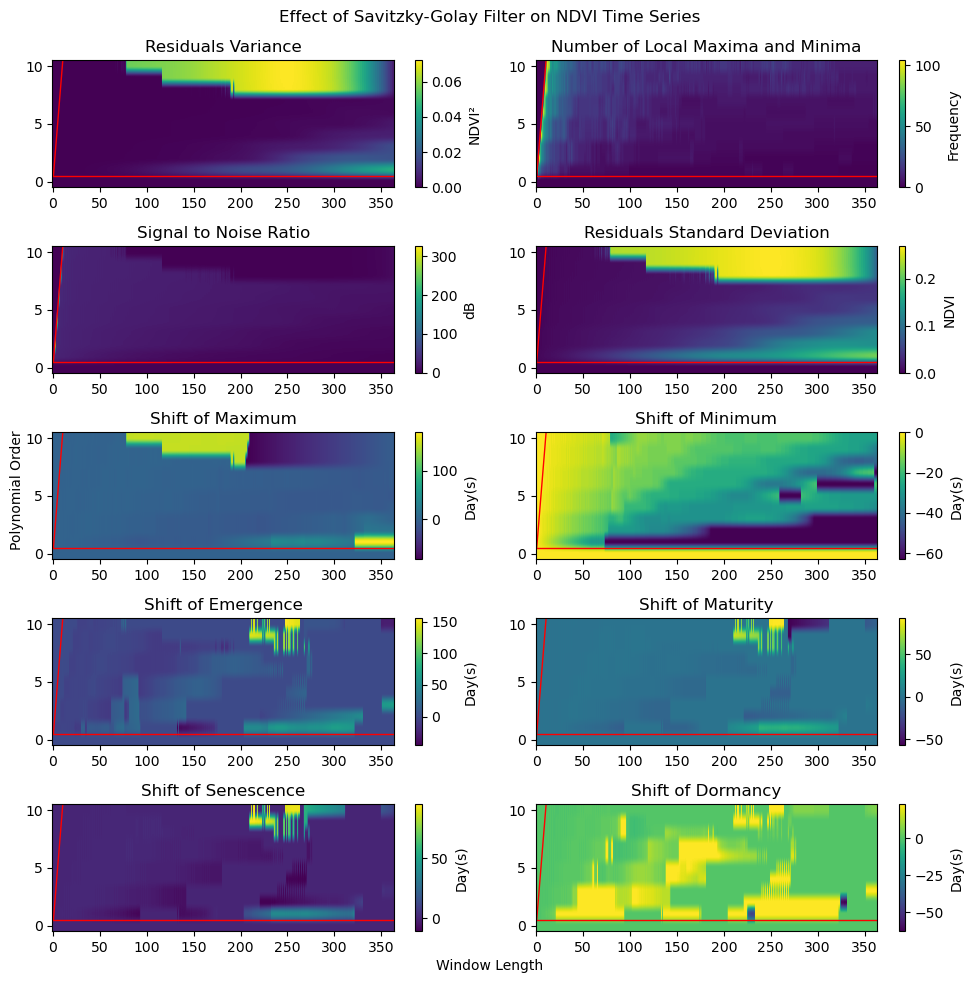

In [7]:
max_ply_order=1+10      # 1 to (val+1)
max_window_length=2+362 # 2 to (val+2)
num_LMM_All = np.zeros((max_ply_order,max_window_length))
ResStd_All = np.zeros((max_ply_order,max_window_length))
ResVar_All = np.zeros((max_ply_order,max_window_length))
Max_shift_All = np.zeros((max_ply_order,max_window_length))
Min_shift_All = np.zeros((max_ply_order,max_window_length))
SNR_All = np.zeros((max_ply_order,max_window_length))
emg_shift_All = np.zeros((max_ply_order,max_window_length))
mat_shift_All = np.zeros((max_ply_order,max_window_length))
sen_shift_All = np.zeros((max_ply_order,max_window_length))
dor_shift_All = np.zeros((max_ply_order,max_window_length))

org_Max = np.argmax(org_ts)
org_Min = np.argmin(org_ts)
org_stages=process_macd(org_ts, yt, 'mean', start_season, end_season)

for i in np.arange(1,max_ply_order,1):
    for j in np.arange(2,max_window_length,1):
        if j>i:
            flt_ts = signal.savgol_filter(org_ts, window_length=j, polyorder=i)

            local_maxima_indices = np.where((flt_ts[:-2] < flt_ts[1:-1]) & (flt_ts[1:-1] > flt_ts[2:]))[0] + 1
            local_minima_indices = np.where((flt_ts[:-2] > flt_ts[1:-1]) & (flt_ts[1:-1] < flt_ts[2:]))[0] + 1
            flt_stages=process_macd(flt_ts, yt, 'flt', start_season, end_season)

            if flt_stages[0]!=0:
                emg_shift_All[i,j] = flt_stages[0].dayofyear-org_stages[0].dayofyear
                mat_shift_All[i,j] = flt_stages[1].dayofyear-org_stages[1].dayofyear
                sen_shift_All[i,j] = flt_stages[2].dayofyear-org_stages[2].dayofyear
                dor_shift_All[i,j] = flt_stages[3].dayofyear-org_stages[3].dayofyear
            else:
                emg_shift_All[i,j] = 0
                mat_shift_All[i,j] = 0
                sen_shift_All[i,j] = 0
                dor_shift_All[i,j] = 0

            ResVar_All[i,j] = np.var(flt_ts-org_ts)
            ResStd_All[i,j] = np.std(flt_ts-org_ts)
            num_LMM_All[i,j] = len(local_maxima_indices)+len(local_minima_indices)
            Max_shift_All[i,j] = np.argmax(flt_ts)-org_Max
            Min_shift_All[i,j] = np.argmin(flt_ts)-org_Min
            SNR_All[i,j] = 10 * np.log10(np.var(org_ts) / np.var(org_ts - flt_ts))

def plot_heatmap(ax, data, title, label, cmap, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.min(data)
    if vmax is None:
        vmax = np.max(data)
    im = ax.imshow(data, cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect='auto', origin='lower')
    fig.colorbar(im, ax=ax, orientation='vertical', label=label)
    ax.set_title(title)
    ax.axhline(y=0.5, color='red',linewidth=1)
    ax.plot([0.5, max_ply_order-0.5], [0.5, max_ply_order-0.5], color='red', linewidth=1)

fig, ax = plt.subplots(5, 2, figsize=(10, 10))
ax=ax.flatten()

plot_heatmap(ax[0], ResVar_All, 'Residuals Variance', 'NDVI\u00B2', 'viridis')
plot_heatmap(ax[1], num_LMM_All, 'Number of Local Maxima and Minima', 'Frequency', 'viridis')
plot_heatmap(ax[2], SNR_All, 'Signal to Noise Ratio', 'dB', 'viridis')
plot_heatmap(ax[3], ResStd_All, 'Residuals Standard Deviation', 'NDVI', 'viridis')
plot_heatmap(ax[4], Max_shift_All, 'Shift of Maximum', 'Day(s)', 'viridis')
plot_heatmap(ax[5], Min_shift_All, 'Shift of Minimum', 'Day(s)', 'viridis')
plot_heatmap(ax[6], emg_shift_All, 'Shift of Emergence', 'Day(s)', 'viridis')
plot_heatmap(ax[7], mat_shift_All, 'Shift of Maturity', 'Day(s)', 'viridis')
plot_heatmap(ax[8], sen_shift_All, 'Shift of Senescence', 'Day(s)', 'viridis')
plot_heatmap(ax[9], dor_shift_All, 'Shift of Dormancy', 'Day(s)', 'viridis')

fig.text(0.5, 0.02, 'Window Length', ha='center')
fig.text(0.02, 0.5, 'Polynomial Order', va='center', rotation='vertical')
fig.suptitle('Effect of Savitzky-Golay Filter on NDVI Time Series', fontsize=12)
plt.tight_layout(rect=[0.02, 0.02, 1, 0.995])
plt.savefig('result/SG_heatmap.pdf')
plt.show()

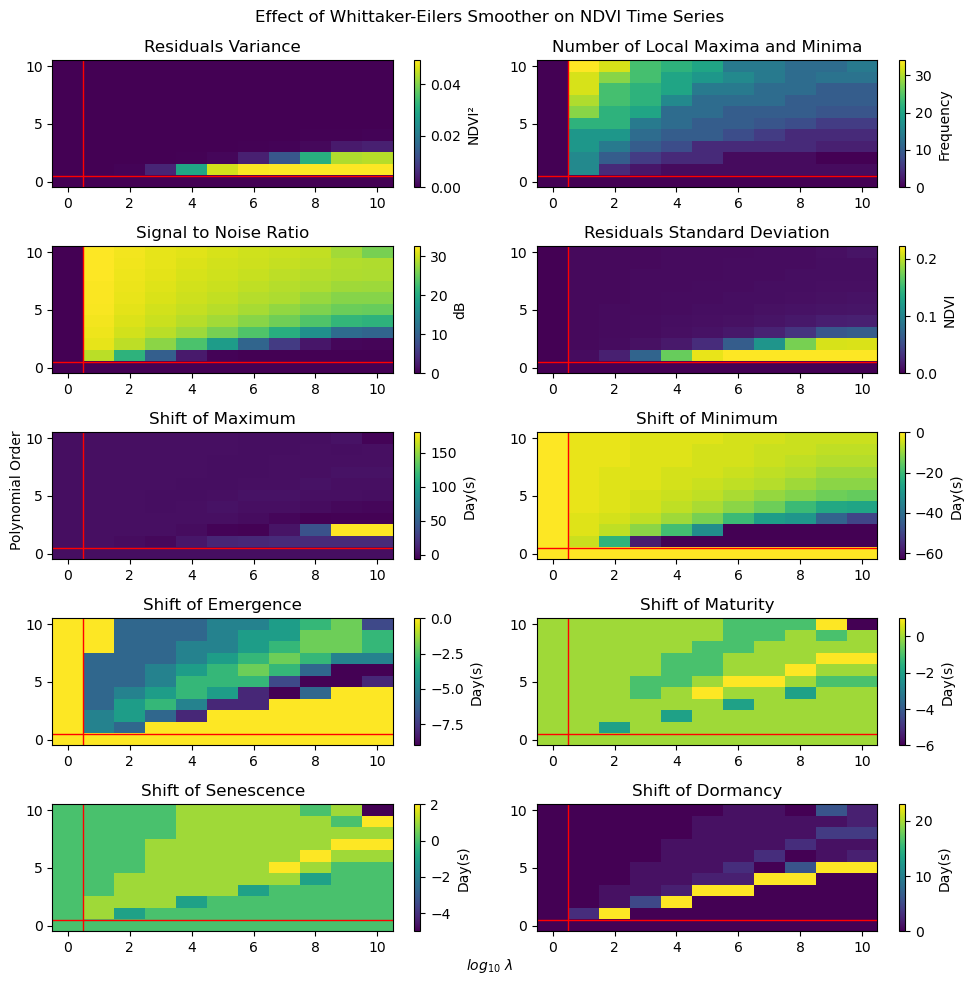

In [8]:
max_ply_order=1+10      # 1 to (val+1)
Lambda=1+10 # 2 to (val+2)
num_LMM_All = np.zeros((max_ply_order,Lambda))
ResStd_All = np.zeros((max_ply_order,Lambda))
ResVar_All = np.zeros((max_ply_order,Lambda))
Max_shift_All = np.zeros((max_ply_order,Lambda))
Min_shift_All = np.zeros((max_ply_order,Lambda))
SNR_All = np.zeros((max_ply_order,Lambda))
emg_shift_All = np.zeros((max_ply_order,Lambda))
mat_shift_All = np.zeros((max_ply_order,Lambda))
sen_shift_All = np.zeros((max_ply_order,Lambda))
dor_shift_All = np.zeros((max_ply_order,Lambda))

org_Max = np.argmax(org_ts)
org_Min = np.argmin(org_ts)
org_stages=process_macd(org_ts, yt, 'mean', start_season, end_season)

for i in np.arange(1,max_ply_order,1):
    for j in np.arange(1,Lambda,1):
        flt_ts = sth.WEfilter(org_ts,i,10**j)

        local_maxima_indices = np.where((flt_ts[:-2] < flt_ts[1:-1]) & (flt_ts[1:-1] > flt_ts[2:]))[0] + 1
        local_minima_indices = np.where((flt_ts[:-2] > flt_ts[1:-1]) & (flt_ts[1:-1] < flt_ts[2:]))[0] + 1
        flt_stages=process_macd(flt_ts, yt, 'flt', start_season, end_season)

        if flt_stages[0]!=0:
            emg_shift_All[i,j] = flt_stages[0].dayofyear-org_stages[0].dayofyear
            mat_shift_All[i,j] = flt_stages[1].dayofyear-org_stages[1].dayofyear
            sen_shift_All[i,j] = flt_stages[2].dayofyear-org_stages[2].dayofyear
            dor_shift_All[i,j] = flt_stages[3].dayofyear-org_stages[3].dayofyear
        else:
            emg_shift_All[i,j] = 0
            mat_shift_All[i,j] = 0
            sen_shift_All[i,j] = 0
            dor_shift_All[i,j] = 0

        ResVar_All[i,j] = np.var(flt_ts-org_ts)
        ResStd_All[i,j] = np.std(flt_ts-org_ts)
        num_LMM_All[i,j] = len(local_maxima_indices)+len(local_minima_indices)
        Max_shift_All[i,j] = np.argmax(flt_ts)-org_Max
        Min_shift_All[i,j] = np.argmin(flt_ts)-org_Min
        SNR_All[i,j] = 10 * np.log10(np.var(org_ts) / np.var(org_ts - flt_ts))


def plot_heatmap(ax, data, title, label, cmap, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.min(data)
    if vmax is None:
        vmax = np.max(data)
    im = ax.imshow(data, cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect='auto', origin='lower')
    fig.colorbar(im, ax=ax, orientation='vertical', label=label)
    ax.set_title(title)
    ax.axhline(y=0.5, color='red',linewidth=1)
    ax.axvline(x=0.5, color='red',linewidth=1)

fig, ax = plt.subplots(5, 2, figsize=(10, 10))
ax=ax.flatten()

plot_heatmap(ax[0], ResVar_All, 'Residuals Variance', 'NDVI\u00B2', 'viridis')
plot_heatmap(ax[1], num_LMM_All, 'Number of Local Maxima and Minima', 'Frequency', 'viridis')
plot_heatmap(ax[2], SNR_All, 'Signal to Noise Ratio', 'dB', 'viridis')
plot_heatmap(ax[3], ResStd_All, 'Residuals Standard Deviation', 'NDVI', 'viridis')
plot_heatmap(ax[4], Max_shift_All, 'Shift of Maximum', 'Day(s)', 'viridis')
plot_heatmap(ax[5], Min_shift_All, 'Shift of Minimum', 'Day(s)', 'viridis')
plot_heatmap(ax[6], emg_shift_All, 'Shift of Emergence', 'Day(s)', 'viridis')
plot_heatmap(ax[7], mat_shift_All, 'Shift of Maturity', 'Day(s)', 'viridis')
plot_heatmap(ax[8], sen_shift_All, 'Shift of Senescence', 'Day(s)', 'viridis')
plot_heatmap(ax[9], dor_shift_All, 'Shift of Dormancy', 'Day(s)', 'viridis')

fig.text(0.5, 0.02, '$log_{10}$ $\\lambda$', ha='center')
fig.text(0.02, 0.5, 'Polynomial Order', va='center', rotation='vertical')
fig.suptitle('Effect of Whittaker-Eilers Smoother on NDVI Time Series', fontsize=12)
plt.tight_layout(rect=[0.02, 0.02, 1, 0.995])
plt.savefig('result/WE_heatmap.pdf')
plt.show()

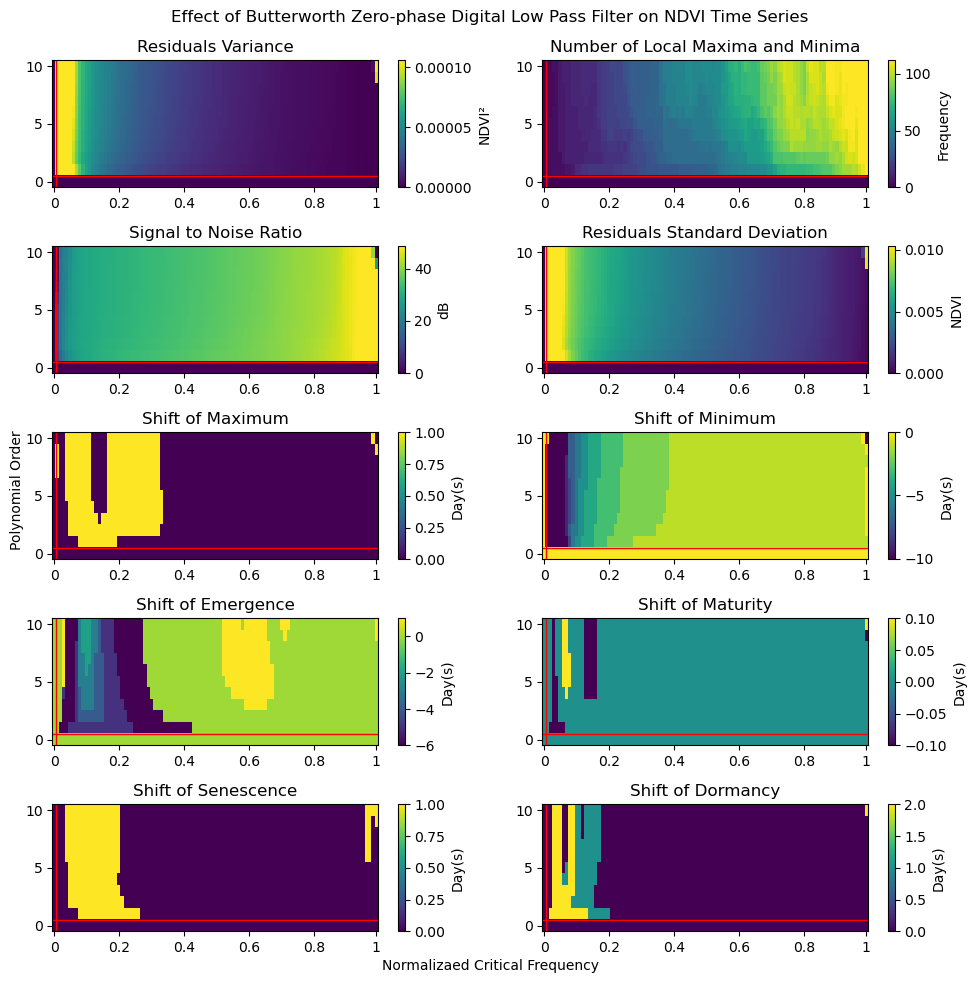

In [9]:
max_ply_order=1+10      # 1 to (val+1)
frequency=1+99 # 1 to (val+1)
num_LMM_All = np.zeros((max_ply_order,frequency))
ResStd_All = np.zeros((max_ply_order,frequency))
ResVar_All = np.zeros((max_ply_order,frequency))
Max_shift_All = np.zeros((max_ply_order,frequency))
Min_shift_All = np.zeros((max_ply_order,frequency))
SNR_All = np.zeros((max_ply_order,frequency))
emg_shift_All = np.zeros((max_ply_order,frequency))
mat_shift_All = np.zeros((max_ply_order,frequency))
sen_shift_All = np.zeros((max_ply_order,frequency))
dor_shift_All = np.zeros((max_ply_order,frequency))

org_Max = np.argmax(org_ts)
org_Min = np.argmin(org_ts)
org_stages=process_macd(org_ts, yt, 'mean', start_season, end_season)

for i in np.arange(1,max_ply_order,1):
    for j in np.arange(1,frequency,1):
        flt_ts = sth.IIRff(org_ts, i, j/100)

        local_maxima_indices = np.where((flt_ts[:-2] < flt_ts[1:-1]) & (flt_ts[1:-1] > flt_ts[2:]))[0] + 1
        local_minima_indices = np.where((flt_ts[:-2] > flt_ts[1:-1]) & (flt_ts[1:-1] < flt_ts[2:]))[0] + 1
        flt_stages=process_macd(flt_ts, yt, 'flt', start_season, end_season)

        if flt_stages[0]!=0:
            emg_shift_All[i,j] = flt_stages[0].dayofyear-org_stages[0].dayofyear
            mat_shift_All[i,j] = flt_stages[1].dayofyear-org_stages[1].dayofyear
            sen_shift_All[i,j] = flt_stages[2].dayofyear-org_stages[2].dayofyear
            dor_shift_All[i,j] = flt_stages[3].dayofyear-org_stages[3].dayofyear
        else:
            emg_shift_All[i,j] = 0
            mat_shift_All[i,j] = 0
            sen_shift_All[i,j] = 0
            dor_shift_All[i,j] = 0

        ResVar_All[i,j] = np.var(flt_ts-org_ts)
        ResStd_All[i,j] = np.std(flt_ts-org_ts)
        num_LMM_All[i,j] = len(local_maxima_indices)+len(local_minima_indices)
        Max_shift_All[i,j] = np.argmax(flt_ts)-org_Max
        Min_shift_All[i,j] = np.argmin(flt_ts)-org_Min
        SNR_All[i,j] = 10 * np.log10(np.var(org_ts) / np.var(org_ts - flt_ts))

def plot_heatmap(ax, data, title, label, cmap, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.percentile(data, 5)
    if vmax is None:
        vmax = np.percentile(data, 95)
    im = ax.imshow(data, cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect='auto', origin='lower')
    fig.colorbar(im, ax=ax, orientation='vertical', label=label)
    ax.set_title(title)
    ax.axhline(y=0.5, color='red',linewidth=1)
    ax.axvline(x=0.5, color='red',linewidth=1)
    ax.set_xticks([0, 20, 40, 60, 80, 99])
    ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1])

fig, ax = plt.subplots(5, 2, figsize=(10, 10))
ax=ax.flatten()

plot_heatmap(ax[0], ResVar_All, 'Residuals Variance', 'NDVI\u00B2', 'viridis')
plot_heatmap(ax[1], num_LMM_All, 'Number of Local Maxima and Minima', 'Frequency', 'viridis')
plot_heatmap(ax[2], SNR_All, 'Signal to Noise Ratio', 'dB', 'viridis')
plot_heatmap(ax[3], ResStd_All, 'Residuals Standard Deviation', 'NDVI', 'viridis')
plot_heatmap(ax[4], Max_shift_All, 'Shift of Maximum', 'Day(s)', 'viridis')
plot_heatmap(ax[5], Min_shift_All, 'Shift of Minimum', 'Day(s)', 'viridis')
plot_heatmap(ax[6], emg_shift_All, 'Shift of Emergence', 'Day(s)', 'viridis')
plot_heatmap(ax[7], mat_shift_All, 'Shift of Maturity', 'Day(s)', 'viridis')
plot_heatmap(ax[8], sen_shift_All, 'Shift of Senescence', 'Day(s)', 'viridis')
plot_heatmap(ax[9], dor_shift_All, 'Shift of Dormancy', 'Day(s)', 'viridis')

fig.text(0.5, 0.02, 'Normalizaed Critical Frequency', ha='center')
fig.text(0.02, 0.5, 'Polynomial Order', va='center', rotation='vertical')
fig.suptitle('Effect of Butterworth Zero-phase Digital Low Pass Filter on NDVI Time Series', fontsize=12)
plt.tight_layout(rect=[0.02, 0.02, 1, 0.995])
plt.savefig('result/IIR_heatmap.pdf')
plt.show()

In [10]:
def LMM_count(ts):
    local_maxima_indices = np.where((ts[:-2] < ts[1:-1]) & (ts[1:-1] > ts[2:]))[0] + 1
    local_minima_indices = np.where((ts[:-2] > ts[1:-1]) & (ts[1:-1] < ts[2:]))[0] + 1
    return len(local_maxima_indices)+len(local_minima_indices)

In [11]:
years = [f'{x}' for x in np.arange(2007,2023,1)]
num_LMM_org=[]
num_LMM_IIR=[]
num_LMM_SG=[]
num_LMM_WE=[]
for i in np.arange(0,148,1):
    #loading data
    sid=i
    ts=pd.read_hdf(f'sites3/Site{sid:03}_NBARint.h5')
    ts=ts.interpolate(method='linear',axis=0)
    for yt in years:
        #smoothing
        IIR_smoothed = sth.IIRff(ts.loc[yt]['mean'], 3, 0.05)
        sg_smoothed = signal.savgol_filter(ts.loc[yt]['mean'], window_length=31, polyorder=2)
        we_smoothed = sth.WEfilter(ts.loc[yt]['mean'],3,1000)
        #LMM
        num_LMM_org.append(LMM_count(ts.loc[yt]['mean'].values))
        num_LMM_IIR.append(LMM_count(IIR_smoothed))
        num_LMM_SG.append(LMM_count(sg_smoothed))
        num_LMM_WE.append(LMM_count(we_smoothed))
        

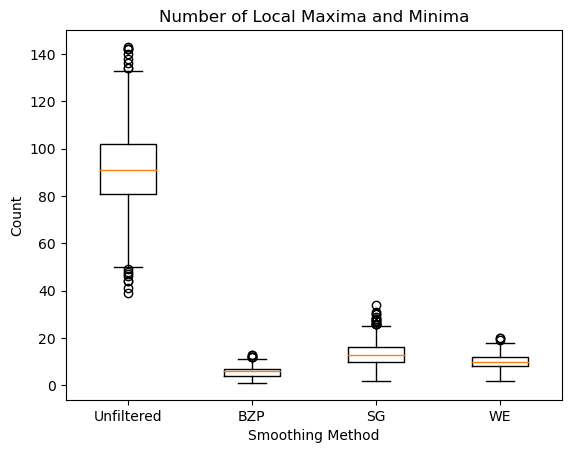

In [12]:
data = [num_LMM_org, num_LMM_IIR, num_LMM_SG, num_LMM_WE]
labels = ['Unfiltered', 'BZP', 'SG', 'WE']

plt.boxplot(data, labels=labels)
plt.title('Number of Local Maxima and Minima')
plt.xlabel('Smoothing Method')
plt.ylabel('Count')
plt.savefig('result/LMM_boxplot.pdf')
plt.show()


In [13]:
max_ply_order=1+10      # 1 to (val+1)
max_window_length=2+362 # 2 to (val+2)
emg_shift_Allsg = np.zeros((max_ply_order,max_window_length))
mat_shift_Allsg = np.zeros((max_ply_order,max_window_length))
sen_shift_Allsg = np.zeros((max_ply_order,max_window_length))
dor_shift_Allsg = np.zeros((max_ply_order,max_window_length))

org_stages=process_macd(org_ts, yt, 'mean', start_season, end_season)

for i in np.arange(1,max_ply_order,1):
    for j in np.arange(2,max_window_length,1):
        if j>i:
            flt_ts = signal.savgol_filter(org_ts, window_length=j, polyorder=i)

            flt_stages=process_macd(flt_ts, yt, 'flt', start_season, end_season)

            if flt_stages[0]!=0:
                emg_shift_Allsg[i,j] = flt_stages[0].dayofyear-org_stages[0].dayofyear
                mat_shift_Allsg[i,j] = flt_stages[1].dayofyear-org_stages[1].dayofyear
                sen_shift_Allsg[i,j] = flt_stages[2].dayofyear-org_stages[2].dayofyear
                dor_shift_Allsg[i,j] = flt_stages[3].dayofyear-org_stages[3].dayofyear
            else:
                emg_shift_Allsg[i,j] = 0
                mat_shift_Allsg[i,j] = 0
                sen_shift_Allsg[i,j] = 0
                dor_shift_Allsg[i,j] = 0

max_ply_order=1+10      # 1 to (val+1)
Lambda=1+10 # 2 to (val+2)
emg_shift_Allbzp = np.zeros((max_ply_order,Lambda))
mat_shift_Allbzp = np.zeros((max_ply_order,Lambda))
sen_shift_Allbzp = np.zeros((max_ply_order,Lambda))
dor_shift_Allbzp = np.zeros((max_ply_order,Lambda))

for i in np.arange(1,max_ply_order,1):
    for j in np.arange(1,Lambda,1):
        flt_ts = sth.WEfilter(org_ts,i,10**j)

        flt_stages=process_macd(flt_ts, yt, 'flt', start_season, end_season)

        if flt_stages[0]!=0:
            emg_shift_Allbzp[i,j] = flt_stages[0].dayofyear-org_stages[0].dayofyear
            mat_shift_Allbzp[i,j] = flt_stages[1].dayofyear-org_stages[1].dayofyear
            sen_shift_Allbzp[i,j] = flt_stages[2].dayofyear-org_stages[2].dayofyear
            dor_shift_Allbzp[i,j] = flt_stages[3].dayofyear-org_stages[3].dayofyear
        else:
            emg_shift_Allbzp[i,j] = 0
            mat_shift_Allbzp[i,j] = 0
            sen_shift_Allbzp[i,j] = 0
            dor_shift_Allbzp[i,j] = 0

max_ply_order=1+10      # 1 to (val+1)
frequency=1+99 # 1 to (val+1)
emg_shift_Allwe = np.zeros((max_ply_order,frequency))
mat_shift_Allwe = np.zeros((max_ply_order,frequency))
sen_shift_Allwe = np.zeros((max_ply_order,frequency))
dor_shift_Allwe = np.zeros((max_ply_order,frequency))

for i in np.arange(1,max_ply_order,1):
    for j in np.arange(1,frequency,1):
        flt_ts = sth.IIRff(org_ts, i, j/100)
        flt_stages=process_macd(flt_ts, yt, 'flt', start_season, end_season)

        if flt_stages[0]!=0:
            emg_shift_Allwe[i,j] = flt_stages[0].dayofyear-org_stages[0].dayofyear
            mat_shift_Allwe[i,j] = flt_stages[1].dayofyear-org_stages[1].dayofyear
            sen_shift_Allwe[i,j] = flt_stages[2].dayofyear-org_stages[2].dayofyear
            dor_shift_Allwe[i,j] = flt_stages[3].dayofyear-org_stages[3].dayofyear
        else:
            emg_shift_Allwe[i,j] = 0
            mat_shift_Allwe[i,j] = 0
            sen_shift_Allwe[i,j] = 0
            dor_shift_Allwe[i,j] = 0

Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order
Error: emergence, maturity, senescence, dormancy not in order


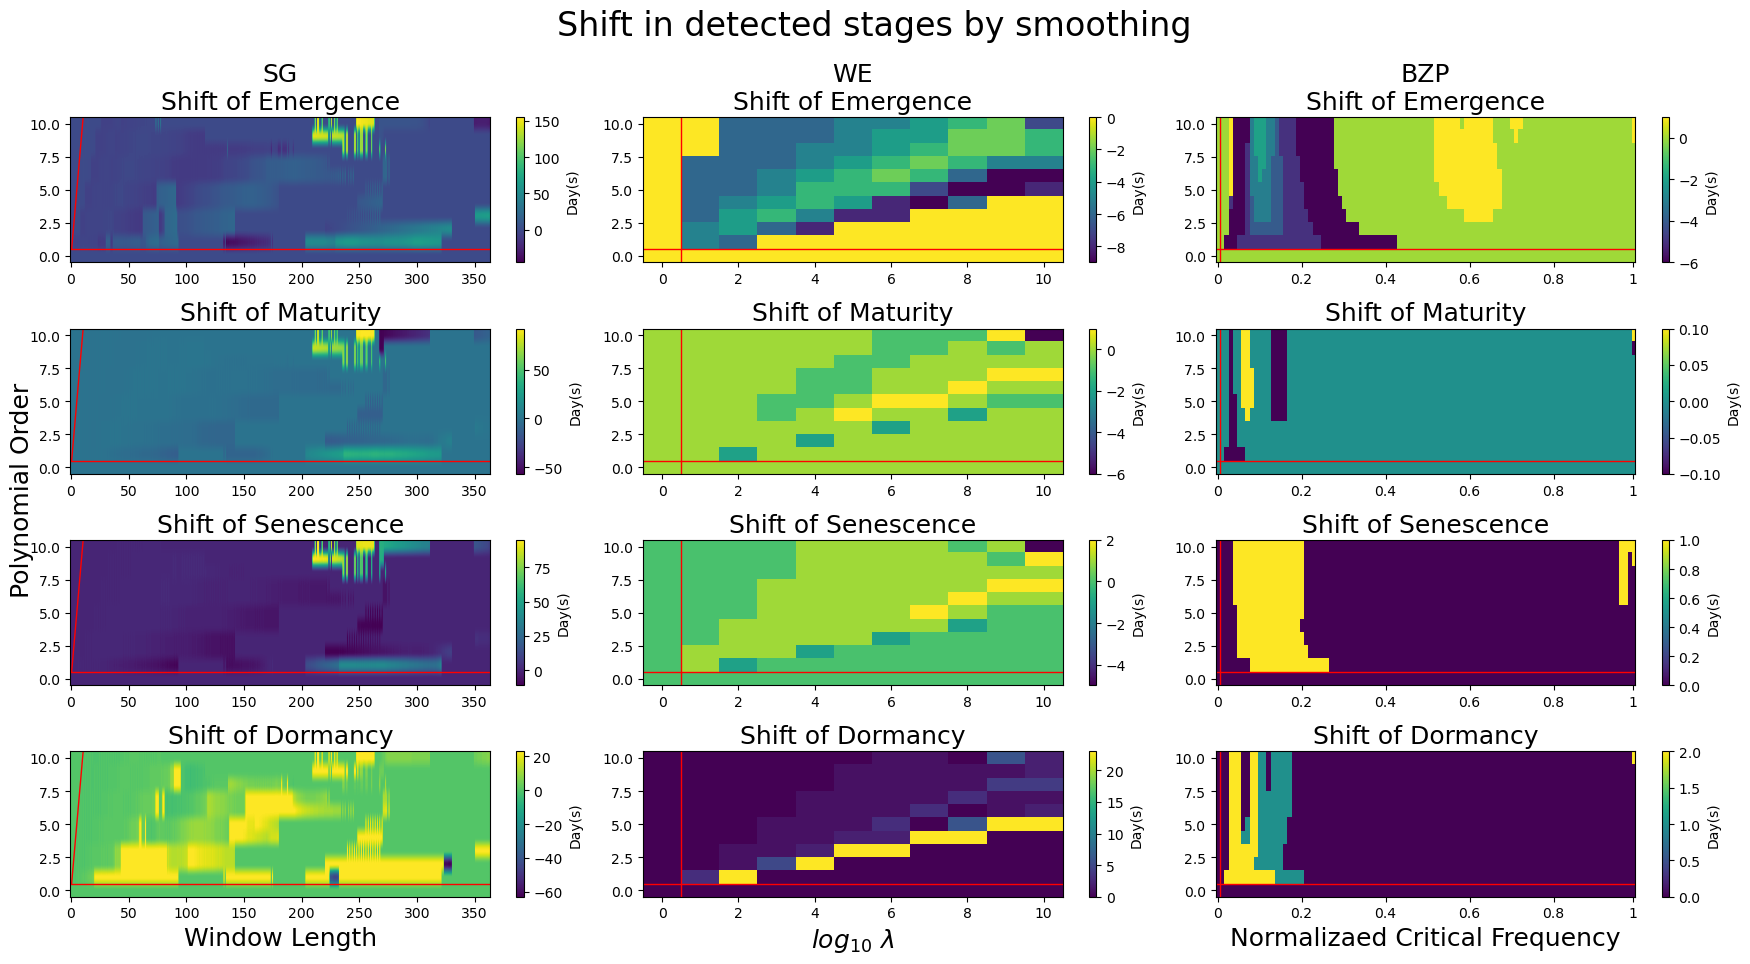

In [14]:
fig, ax = plt.subplots(4, 3, figsize=(18, 10))
ax=ax.flatten()

def plot_heatmap(ax, data, title, label, cmap, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.min(data)
    if vmax is None:
        vmax = np.max(data)
    im = ax.imshow(data, cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect='auto', origin='lower')
    fig.colorbar(im, ax=ax, orientation='vertical', label=label)
    ax.set_title(title, fontsize=18)
    ax.axhline(y=0.5, color='red',linewidth=1)
    ax.plot([0.5, max_ply_order-0.5], [0.5, max_ply_order-0.5], color='red', linewidth=1)

plot_heatmap(ax[0], emg_shift_Allsg, 'Shift of Emergence', 'Day(s)', 'viridis')
plot_heatmap(ax[3], mat_shift_Allsg, 'Shift of Maturity', 'Day(s)', 'viridis')
plot_heatmap(ax[6], sen_shift_Allsg, 'Shift of Senescence', 'Day(s)', 'viridis')
plot_heatmap(ax[9], dor_shift_Allsg, 'Shift of Dormancy', 'Day(s)', 'viridis')

ax[9].set_xlabel('Window Length', fontsize=18)
ax[0].set_title('SG\nShift of Emergence', fontsize=18)


def plot_heatmap(ax, data, title, label, cmap, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.min(data)
    if vmax is None:
        vmax = np.max(data)
    im = ax.imshow(data, cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect='auto', origin='lower')
    fig.colorbar(im, ax=ax, orientation='vertical', label=label)
    ax.set_title(title, fontsize=18)
    ax.axhline(y=0.5, color='red',linewidth=1)
    ax.axvline(x=0.5, color='red',linewidth=1)


plot_heatmap(ax[1], emg_shift_Allbzp, 'Shift of Emergence', 'Day(s)', 'viridis')
plot_heatmap(ax[4], mat_shift_Allbzp, 'Shift of Maturity', 'Day(s)', 'viridis')
plot_heatmap(ax[7], sen_shift_Allbzp, 'Shift of Senescence', 'Day(s)', 'viridis')
plot_heatmap(ax[10], dor_shift_Allbzp, 'Shift of Dormancy', 'Day(s)', 'viridis')

ax[10].set_xlabel('$log_{10}$ $\\lambda$', fontsize=18)
ax[1].set_title('WE\nShift of Emergence', fontsize=18)


def plot_heatmap(ax, data, title, label, cmap, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.percentile(data, 5)
    if vmax is None:
        vmax = np.percentile(data, 95)
    im = ax.imshow(data, cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax), aspect='auto', origin='lower')
    fig.colorbar(im, ax=ax, orientation='vertical', label=label)
    ax.set_title(title, fontsize=18)
    ax.axhline(y=0.5, color='red',linewidth=1)
    ax.axvline(x=0.5, color='red',linewidth=1)
    ax.set_xticks([0, 20, 40, 60, 80, 99])
    ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1])

plot_heatmap(ax[2], emg_shift_Allwe, 'Shift of Emergence', 'Day(s)', 'viridis')
plot_heatmap(ax[5], mat_shift_Allwe, 'Shift of Maturity', 'Day(s)', 'viridis')
plot_heatmap(ax[8], sen_shift_Allwe, 'Shift of Senescence', 'Day(s)', 'viridis')
plot_heatmap(ax[11], dor_shift_Allwe, 'Shift of Dormancy', 'Day(s)', 'viridis')

ax[11].set_xlabel('Normalizaed Critical Frequency', fontsize=18)
fig.text(0.02, 0.5, 'Polynomial Order', va='center', rotation='vertical', fontsize=18)
ax[2].set_title('BZP\nShift of Emergence', fontsize=18)
fig.suptitle('Shift in detected stages by smoothing', fontsize=24)
plt.tight_layout(rect=[0.03, 0.02, 1, 0.99])
plt.savefig('result/all_heatmap.pdf')
plt.show()